In [11]:
!pip install --upgrade tensorflow


Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.1.0)


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
!jar xvf "/content/drive/My Drive/Dataset.zip"

Streaming output truncated to the last 5000 lines.
 inflated: Dataset/Dress/Dress_471.jpg
 inflated: Dataset/Dress/Dress_472.jpg
 inflated: Dataset/Dress/Dress_473.jpg
 inflated: Dataset/Dress/Dress_474.jpg
 inflated: Dataset/Dress/Dress_475.jpg
 inflated: Dataset/Dress/Dress_476.jpg
 inflated: Dataset/Dress/Dress_477.jpg
 inflated: Dataset/Dress/Dress_478.jpg
 inflated: Dataset/Dress/Dress_479.jpg
 inflated: Dataset/Dress/Dress_480.jpg
 inflated: Dataset/Dress/Dress_481.jpg
 inflated: Dataset/Dress/Dress_482.jpg
 inflated: Dataset/Dress/Dress_483.jpg
 inflated: Dataset/Dress/Dress_484.jpg
 inflated: Dataset/Dress/Dress_485.jpg
 inflated: Dataset/Dress/Dress_486.jpg
 inflated: Dataset/Dress/Dress_487.jpg
 inflated: Dataset/Dress/Dress_488.jpg
 inflated: Dataset/Dress/Dress_489.jpg
 inflated: Dataset/Dress/Dress_490.jpg
 inflated: Dataset/Dress/Dress_491.jpg
 inflated: Dataset/Dress/Dress_492.jpg
 inflated: Dataset/Dress/Dress_493.jpg
 inflated: Dataset/Dress/Dress_494.jpg
 inflated: Da

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

import sklearn
assert sklearn.__version__ >= "0.20"

import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"
from tqdm import tqdm
np.random.seed(42)
tf.random.set_seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)


def plot_image(image):
  plt.imshow(image, cmap = "gray", interpolation = "nearest")
  plt.axis("off")

def plot_color_image(image):
  plt.imshow(image, interpolation = "nearest")
  plt.axis("off")









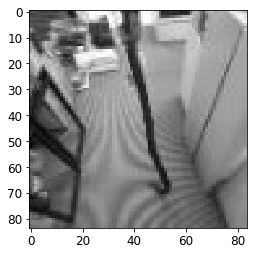

In [15]:
DATADIR = "/content/Dataset"
class_examples = ["Belt","Dress", "High_Heels","Pants","Shirt",
                  "Skirt","Shoes","Slipper","Socks","Specs"]
for category in class_examples:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

In [0]:
img_size = 84

def create_dataset():
    dataset = []
    for category in class_examples:
        path = os.path.join(DATADIR, category)
        class_num = class_examples.index(category) #assign 0-9 as classification index

        for img in tqdm(os.listdir(path)):
          try:
              img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #convert to array
              new_array = cv2.resize(img_array,(img_size,img_size)) #resize to normalise data size
              dataset.append([new_array, class_num]) 

          except Exception as e:
            print("error")  #catch exception 
    return dataset

In [17]:
dataset = create_dataset()

  0%|          | 0/612 [00:00<?, ?it/s]

error


  0%|          | 0/604 [00:00<?, ?it/s]

error
error


100%|██████████| 600/600 [00:00<00:00, 9850.37it/s]


In [18]:
print(len(dataset))

6059


In [19]:
type(dataset)

list

In [0]:
X = []
y = []

In [26]:
for features, label in dataset:
    X.append(features)
    y.append(label)

y = np.array(y)
X = np.asarray(X)
X = X.reshape(-1, img_size, img_size, 1)

from sklearn.utils import shuffle 
X,y = shuffle(X,y)

from sklearn.model_selection import train_test_split

X_train_full,  X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.1, random_state = 1)




X_train, X_valid = X_train_full[-5000:], X_train_full[:-5000]
y_train, y_valid = y_train_full[-5000:], y_train_full[:-5000]

print(len(X_train))
print(len(y_train))
print(len(X))
print(len(y))
X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std


print(len(X_train))
print(len(y_train))
print(len(X))
print(len(y))

5000
5000
6059
6059
5000
5000
6059
6059


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers





model = Sequential() 
model.add(Conv2D(filters = 64, kernel_size = 7, input_shape = [img_size, img_size, 1]))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 128,  kernel_size = 7))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(filters = 256,  kernel_size = 7))
model.add(MaxPooling2D(pool_size = 2))
model.add(Flatten())
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 54, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, validation_data = [X_valid, y_valid])

Train on 5000 samples, validate on 453 samples
Epoch 1/50
5000/5000 [==============================] - 12s 2ms/sample - loss: 2.1702 - acc: 0.1936 - val_loss: 2.0070 - val_acc: 0.4305
Epoch 2/50
5000/5000 [==============================] - 5s 1ms/sample - loss: 2.0135 - acc: 0.2720 - val_loss: 1.8087 - val_acc: 0.4216
Epoch 3/50
5000/5000 [==============================] - 5s 1ms/sample - loss: 1.9090 - acc: 0.3108 - val_loss: 1.7292 - val_acc: 0.4768
Epoch 4/50
5000/5000 [==============================] - 5s 1ms/sample - loss: 1.8262 - acc: 0.3446 - val_loss: 1.5940 - val_acc: 0.4967
Epoch 5/50
5000/5000 [==============================] - 5s 1ms/sample - loss: 1.7440 - acc: 0.3804 - val_loss: 1.4507 - val_acc: 0.5629
Epoch 6/50
5000/5000 [==============================] - 5s 1ms/sample - loss: 1.6658 - acc: 0.4024 - val_loss: 1.3639 - val_acc: 0.6115
Epoch 7/50
5000/5000 [==============================] - 5s 1ms/sample - loss: 1.5871 - acc: 0.4442 - val_loss: 1.3310 - val_acc: 0.6026


In [28]:
score, test_acc = model.evaluate(X_test, y_test)
print('Score:', score)
print('Test accuracy: ',test_acc)

606/606 [==============================] - 0s 486us/sample - loss: 1.2859 - acc: 0.7129
Score: 1.2858776298686616
Test accuracy:  0.7128713


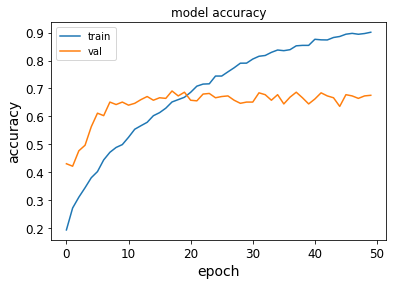

In [29]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

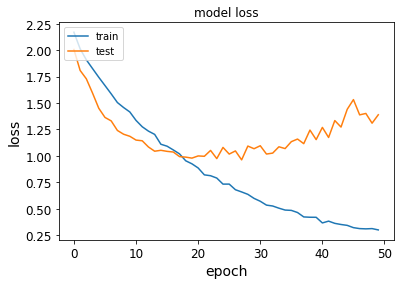

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

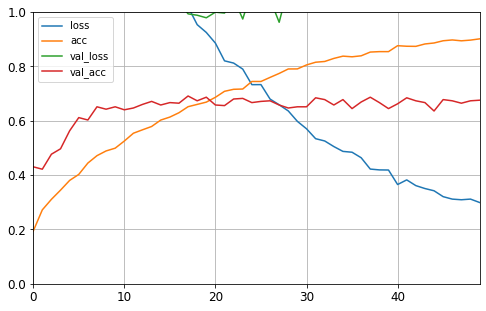

In [31]:
import pandas as pd 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()